# Figure 1

## Preparation

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import gaussian_kde, ttest_ind, mannwhitneyu

Plot style

In [3]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 11,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

Special character

In [4]:
mu = chr(956)
mu

'μ'

Load data

In [5]:
df = pd.read_table('../phylogeny/place/fine_all.tsv', index_col = 0)
df.head()

,length,width,volume,surface,shape,species,genus,family,order,class,...,rank,node,genome,gc,proteins,coding,rrnas,MILC,ENCprime,hash
taxid,,,,,,,,,,,,,,,,,,,,,
taxid11,2.371708,1.060660,1.783187,7.902917,rod-shaped,Cellulomonas gilvus,Cellulomonas,Cellulomonadaceae,Micrococcales,Actinomycetia,...,species,G000218545,3526441.0,73.81,3206.0,91.772782,2.0,-0.262005,0.100836,1.88
taxid14,10.000000,0.489898,1.854174,15.390598,rod-shaped,Dictyoglomus thermophilum,Dictyoglomus,Dictyoglomaceae,Dictyoglomales,Dictyoglomia,...,species,G000020965,1959987.0,33.74,1890.0,93.777255,2.0,-0.064429,0.030205,0.58
taxid23,1.500000,0.700000,0.487470,3.298672,rod-shaped,Shewanella colwelliana,Shewanella,Shewanellaceae,Alteromonadales,Gammaproteobacteria,...,species,G000518705,4575622.0,45.39,4094.0,87.383136,0.0,-0.653363,0.248987,1.25
taxid104,1.039230,0.346410,0.087062,1.130973,ring-shaped,Cyclobacterium marinum,Cyclobacterium,Cyclobacteriaceae,Cytophagales,Cytophagia,...,species,G000222485,6221273.0,38.15,5114.0,87.121317,3.0,-0.200638,0.102722,1.33
taxid114,2.049390,2.049390,4.506844,13.194689,spherical,Gemmata obscuriglobus,Gemmata,Gemmataceae,Gemmatales,Planctomycetia,...,species,G000171775,9161841.0,67.18,8067.0,84.083188,3.0,-0.154188,0.056476,1.00


In [6]:
df['log_length'] = np.log10(df['length'])
df['log_width'] = np.log10(df['width'])
df['log_volume'] = np.log10(df['volume'])
df['log_surface'] = np.log10(df['surface'])
df['vsratio'] = df['volume'] / df['surface']
df['log_vsratio'] = np.log10(df['vsratio'])

In [7]:
df_bac = df[df['kingdom'] == 'Bacteria']

In [8]:
df_arch = df[df['kingdom'] == 'Archaea']

In [9]:
ttest_ind(df_bac['log_vsratio'], df_arch['log_vsratio'])

Ttest_indResult(statistic=-4.408536302704342, pvalue=1.060983588663239e-05)

In [10]:
mannwhitneyu(df_bac['log_vsratio'], df_arch['log_vsratio'])

MannwhitneyuResult(statistic=324195.5, pvalue=6.676956909722328e-10)

In [11]:
df_bac.shape

(5209, 28)

In [12]:
df_arch.shape

(171, 28)

In [13]:
# sh_labels = ['Rods', 'Cocci', 'Spirals', 'Filaments']
sh_labels = ['Bacteria', 'Archaea']
# sh_colors = ['#456990', '#ef767a', '#49beaa', '#9d4edd']
sh_colors = ['#ef767a', '#456990']

In [14]:
sh_dats = [df_bac['log_vsratio'], df_arch['log_vsratio']]

In [15]:
violin_args = dict(widths=0.8, showmedians=False, showextrema=False)
box_args = dict(whis=None, showcaps=False, widths=0.06, patch_artist=True,
                boxprops=dict(color='k', facecolor='k', alpha=0.8),
                whiskerprops=dict(color='k', linewidth=1, alpha=0.8),
                medianprops=dict(color='w', linewidth=2))

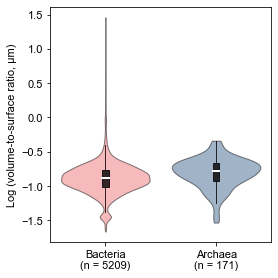

In [16]:
plt.figure(figsize=(4, 4))
sh_ticks = []
for i, (dat_, label, color) in enumerate(zip(sh_dats, sh_labels, sh_colors)):
    vlp = plt.violinplot(dat_, positions=[i], **violin_args)
    vlp['bodies'][0].set_facecolor(color)
    vlp['bodies'][0].set_edgecolor('k')
    vlp['bodies'][0].set_alpha(0.5)
    plt.boxplot(dat_, positions=[i], **box_args)
    sh_ticks.append(f'{label}\n(n = {dat_.shape[0]})')
plt.xticks(np.arange(len(sh_dats)), sh_ticks)
plt.ylabel(f'Log (volume-to-surface ratio, {mu}m)')
# plt.ylim(-1.55, 1.5)
# plt.savefig('fig1_inset.svg')
plt.show()

In [17]:
np.mean(df_bac['log_vsratio'])

-0.8905113428792305

In [18]:
np.mean(df_arch['log_vsratio'])

-0.8103829256166495

In [19]:
mu_bac, std_bac = np.mean(df_bac['log_vsratio']), np.std(df_bac['log_vsratio'])

In [20]:
round(10 ** (mu_bac + std_bac), 2)

0.22

In [21]:
mu_arc, std_arc = np.mean(df_arch['log_surface']), np.std(df_arch['log_surface'])

In [22]:
round(10 ** (mu_arc + std_arc), 2)

12.19

Analyses

In [23]:
df = df[df['kingdom'] == 'Archaea']
df.head()

,length,width,volume,surface,shape,species,genus,family,order,class,...,rrnas,MILC,ENCprime,hash,log_length,log_width,log_volume,log_surface,vsratio,log_vsratio
taxid,,,,,,,,,,,,,,,,,,,,,
taxid2161,12.247449,0.707107,4.717002,27.206990,rod,Methanobacterium bryantii,Methanobacterium,Methanobacteriaceae,Methanobacteriales,Methanobacteria,...,1.0,-0.228116,0.102580,0.09,1.088046,-0.150515,0.673666,1.434681,0.173375,-0.761014
taxid2162,5.477226,0.565685,1.329186,9.733869,rod,Methanobacterium formicicum,Methanobacterium,Methanobacteriaceae,Methanobacteriales,Methanobacteria,...,2.0,-0.261580,0.119786,1.77,0.738561,-0.247425,0.123586,0.988285,0.136553,-0.864700
taxid2163,3.872983,0.632456,1.150503,7.695299,rod,Methanobacterium ivanovii,Methanobacterium,Methanobacteriaceae,Methanobacteriales,Methanobacteria,...,1.0,-0.228116,0.102580,0.68,0.588046,-0.198970,0.060888,0.886225,0.149507,-0.825338
taxid2171,3.535534,0.500000,0.661476,5.553604,rod,Methanobacterium palustre,Methanobacterium,Methanobacteriaceae,Methanobacteriales,Methanobacteria,...,1.0,-0.228116,0.102580,1.31,0.548455,-0.301030,-0.179486,0.744575,0.119107,-0.924061
taxid2173,1.000000,0.648074,0.258608,2.035985,rod,Methanobrevibacter smithii,Methanobrevibacter,Methanobacteriaceae,Methanobacteriales,Methanobacteria,...,1.0,-0.320990,0.134639,0.07,0.000000,-0.188375,-0.587358,0.308775,0.127019,-0.896133


Sample size (total number of species)

In [24]:
n = df.shape[0]
n

171

Manipulate data

In [25]:
def ref_shape(s):
    """Reformat "shape column".
    """
    if 'shaped' in s:
        s = s.split('-')[0]
    elif s == 'sphere/spheroid':
        return 'sphere'
    elif s == 'rods':
        return 'rod'
    elif '/' in s:
        s = '-'.join(s.split('/'))
    if s in ('ovoid', 'oval', 'ellipsoidal'):
        return 'ovoid'
    elif s == 'pear':
        return 'sphere'
    elif s in ('sphere', 'spherical'):
        return 'sphere'
    else:
        return s

In [26]:
df['shape'] = df['shape'].fillna('').map(ref_shape)

In [27]:
df['log_length'] = np.log10(df['length'])
df['log_width'] = np.log10(df['width'])
df['log_volume'] = np.log10(df['volume'])
df['log_surface'] = np.log10(df['surface'])
df['vsratio'] = df['volume'] / df['surface']
df['log_vsratio'] = np.log10(df['vsratio'])

## Plotting

In [28]:
xcol, ycol = 'log_length', 'log_width'

In [29]:
x, y = df[xcol], df[ycol]

Perform KDE

In [30]:
kernel = gaussian_kde(np.vstack([x, y]))

Bandwidth

In [31]:
bw = np.sqrt(np.sqrt(np.prod(np.diag(kernel.covariance))))

Plot range (200 x 200 grid, 3x bandwidth beyond extreme)

In [32]:
cut = 3
gridsize = 200

In [33]:
xmin = x.min() - bw * cut
xmax = x.max() + bw * cut

In [34]:
ymin = y.min() - bw * cut
ymax = y.max() + bw * cut

In [35]:
xran = np.linspace(xmin, xmax, gridsize)
yran = np.linspace(ymin, ymax, gridsize)

In [36]:
X, Y = np.meshgrid(xran, yran)

In [37]:
xygrid = np.vstack([X.ravel(), Y.ravel()])

Calculate probability density across the grid.

In [38]:
probs = kernel(xygrid)

In [39]:
Z = probs.reshape(gridsize, gridsize)

Contour above probability mass 0.1%.

In [40]:
thresh = 0.001

In [41]:
probs_sorted = np.sort(probs.ravel())[::-1]
unit_area = (xmax - xmin) * (ymax - ymin) / (gridsize - 1) ** 2
idx = np.flatnonzero(np.cumsum(probs_sorted) >= (1 - thresh) / unit_area)[0]
prob_th = probs_sorted[idx]

Convert to species density.

In [42]:
Z *= (n / 1000)
prob_th *= (n / 1000)

In [43]:
# levels = np.linspace(prob_th, Z.max(), 8)
levels = np.linspace(prob_th, Z.max(), 8)

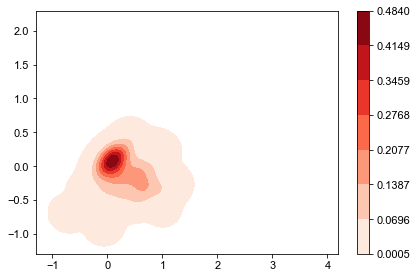

In [44]:
plt.contourf(X, Y, Z, levels=levels, cmap='Reds')
plt.xlim(-1.3, 4.2)
plt.ylim(-1.3, 2.3)
plt.colorbar();

## V/S ratio

Mask size space where length < width.

In [45]:
mask = X < Y

In [46]:
X_masked = np.ma.masked_where(mask, X)
Y_masked = np.ma.masked_where(mask, Y)

In [47]:
X_exp, Y_exp = 10 ** X_masked, 10 ** Y_masked

Volume

In [48]:
V = np.pi * (Y_exp / 2) ** 2 * ((4 / 3) * (Y_exp / 2) + (X_exp - Y_exp))

Surface area

In [49]:
S = 2 * np.pi * (Y_exp / 2) * (2 * (Y_exp / 2) + (X_exp - Y_exp))

V/S ratio

In [50]:
W = np.log10(V / S)

Contour plot

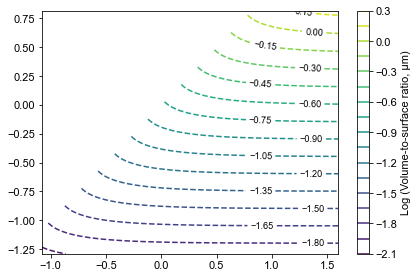

In [51]:
cs = plt.contour(X, Y, W, linestyles='dashed', levels=15)
plt.clabel(cs, fontsize='small', colors='k')
plt.colorbar(label=f'Log (Volume-to-surface ratio, {mu}m)');

## Cell shapes

In [52]:
df['shape'].unique()

array(['rod', 'sphere', 'disk', 'triangular', 'coccus', 'ovoid', '',
       'pleomorphic'], dtype=object)

In [53]:
df['shape'].value_counts()

rod            79
sphere         49
coccus         25
disk            5
                5
ovoid           4
pleomorphic     3
triangular      1
Name: shape, dtype: int64

In [54]:
# sh_keys = [['rod'], ['coccus', 'sphere', 'ovoid'], ['helical', 'spiral', 'vibrio'], ['filament']]
sh_keys = [['coccus', 'sphere', 'ovoid'], ['rod']]
# sh_labels = ['Rods', 'Cocci', 'Spirals', 'Filaments']
sh_labels = ['Cocci', 'Rods']
# sh_colors = ['#456990', '#ef767a', '#49beaa', '#9d4edd']
sh_colors = ['#ef767a', '#456990']

In [55]:
sh_dats = [df.query('shape == @k')['log_vsratio'].values for k in sh_keys]

In [56]:
violin_args = dict(widths=0.8, showmedians=False, showextrema=False)
box_args = dict(whis=None, showcaps=False, widths=0.06, patch_artist=True,
                boxprops=dict(color='k', facecolor='k', alpha=0.8),
                whiskerprops=dict(color='k', linewidth=1, alpha=0.8),
                medianprops=dict(color='w', linewidth=2))

(-1.55, 1.5)

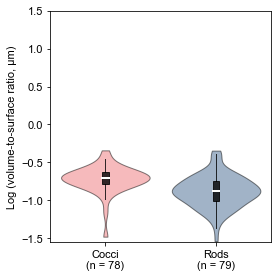

In [57]:
plt.figure(figsize=(4, 4))
sh_ticks = []
for i, (dat_, label, color) in enumerate(zip(sh_dats, sh_labels, sh_colors)):
    vlp = plt.violinplot(dat_, positions=[i], **violin_args)
    vlp['bodies'][0].set_facecolor(color)
    vlp['bodies'][0].set_edgecolor('k')
    vlp['bodies'][0].set_alpha(0.5)
    plt.boxplot(dat_, positions=[i], **box_args)
    sh_ticks.append(f'{label}\n(n = {dat_.shape[0]})')
plt.xticks(np.arange(len(sh_dats)), sh_ticks)
plt.ylabel(f'Log (volume-to-surface ratio, {mu}m)')
plt.ylim(-1.55, 1.5)
# plt.savefig('fig1_inset.svg')

Perform KDE on each shape.

In [58]:
sh_Zs = [gaussian_kde(df.query('shape == @k')[[xcol, ycol]].values.T)(
    xygrid).reshape(gridsize, gridsize) for k in sh_keys]

Determine contour threshold by shape fraction.

In [59]:
sh_fracs = [d.size / n for d in sh_dats]

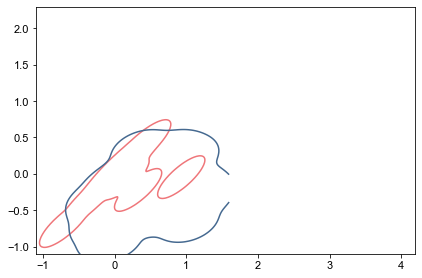

In [60]:
for Z_, label, color, frac in zip(sh_Zs, sh_labels, sh_colors, sh_fracs):
    plt.contour(X, Y, Z_, levels=[0.001 / frac], colors=color)
plt.xlim(-1.1, 4.2)
plt.ylim(-1.1, 2.3)
plt.show()

## Species of interest

In [61]:
species = {
    'taxid562':   'E. coli',
    'taxid1423':  'B. subtilis',
    'taxid77094': 'E. fishelsoni',
    'taxid90372': 'Ca. T. magnifica',
    'taxid90373': 'T. namibiensis',
    'taxid2096':  'M. gallisepticum',
    'taxid2097':  'M. genitalium'
}

## Full plot

In [62]:
from matplotlib.patches import Rectangle

In [63]:
# plt.figure(figsize=(11, 7.5))
# ax = plt.gca()

# # contour plot
# plt.contourf(X, Y, Z, levels=levels, cmap='Reds')
# plt.xlabel(f'Log (Length, {mu}m)', fontsize = 'large', labelpad=10)
# plt.ylabel(f'Log (Width, {mu}m)', fontsize = 'large', labelpad=10)
# plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
# # plt.xlim(-1, 4.3)

# # color bar
# # cax = ax.inset_axes([0.7, 0.05, 0.04, 0.4])
# # plt.colorbar(cax = cax, label='Species density (k)')
# plt.colorbar().set_label(label='Species density (k)', size = 'large')

# # # color bar frame
# # ax.add_patch(Rectangle(
# #     (0.68, 0.03), 0.15, 0.44, transform=ax.transAxes, zorder=3,
# #     linewidth=0.75, edgecolor='k', facecolor='white'))

# # v/s ratio
# cs = plt.contour(X, Y, W, colors='grey', linestyles='dashed',
#                  linewidths=1, levels=15)
# plt.clabel(cs, colors='k', zorder=1)

# # v/s ratio label
# ax2 = ax.twinx()
# ax2.set_yticks([])
# ax2.set_ylabel(f'Log (Volume-to-surface ratio, {mu}m)',
#                fontsize='large', color='grey', labelpad=10)

# # diagonal line
# dmin, dmax = max(xmin, ymin), min(xmax, ymax)
# plt.plot([dmin, dmax], [dmin, dmax], color='grey', lw=3, ls='dashed', alpha=0.5)
# plt.text(dmax * 0.75, dmax * 0.75, 'Length = width', color='grey',
#          ha='center', va='bottom', rotation=45)

# # shape ranges
# for Z_, label, color, frac in zip(sh_Zs, sh_labels, sh_colors, sh_fracs):
#     plt.contour(X, Y, Z_, levels=[0.001 / frac], colors=color)

# # v/s ratio by shape (inset)
# axin = ax.inset_axes([0.02, 0.68, 0.3, 0.3])
# for i, (dat_, label, color) in enumerate(zip(sh_dats, sh_labels, sh_colors)):
#     vlp = axin.violinplot(dat_, positions=[i], **violin_args)
#     vlp['bodies'][0].set_facecolor(color)
#     vlp['bodies'][0].set_edgecolor('k')
#     vlp['bodies'][0].set_alpha(0.6)
#     axin.boxplot(dat_, positions=[i], **box_args)
# axin.set_xticks(ticks = np.arange(len(sh_dats)))
# axin.set_xticklabels(sh_ticks, fontsize = 10.5)
# axin.set_ylim(top=1.55)
# axin.set_ylabel(f'Log (V/S ratio, {mu}m)', fontsize = 11)
# axin.yaxis.set_label_position('right')
# axin.yaxis.tick_right()
# axin.tick_params(top = True, right = True, direction = 'in', which = 'both')

# # # species of interest
# # dfs = df.loc[species.keys()]
# # plt.scatter(xcol, ycol, data=dfs, color='k')
# # for key, value in species.items():
# #     plt.text(*dfs.loc[key][[xcol, ycol]], value, style='italic', ha='center', va='bottom')
    
# plt.xlim(-1.1, 4.2)
# plt.ylim(-1.1, 2.3)
# plt.show()
# # save
# # plt.savefig('figures_all/fig1_density_alt2.svg')

Probability of finding the most common V/S ratio

In [64]:
from scipy.stats import norm

In [65]:
array = df['log_vsratio']
pdf = gaussian_kde(df['log_vsratio'])

In [66]:
mean, std = np.mean(df['log_vsratio']), np.std(df['log_vsratio'])

In [67]:
lower_bound, upper_bound = mean - std, mean + std

In [68]:
probability = norm.cdf(upper_bound, loc=mean, scale=std) - norm.cdf(lower_bound, loc=mean, scale=std)

In [69]:
round(probability, 2)

0.68

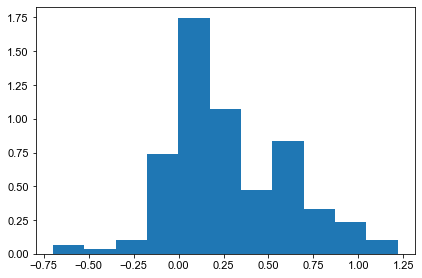

In [70]:
plt.figure()
plt.hist(df['log_length'], density = True, bins = 'auto')
plt.show()